Import required packages

In [ ]:
import random
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

Set slope and intercept

In [ ]:
slope = 0.9 # @param {"type":"slider","min":0.1,"max":10,"step":0.1}
intercept = 10 # @param {"type":"slider","min":0,"max":100,"step":0.1}

Function to generate train data

In [ ]:
def generateTrainData(samples: int, domain: tuple[int, int], noise: int):
    x_train = np.linspace(*domain, samples)

    calculated_noise = np.random.randn(samples) * noise

    y = intercept + slope * x_train

    y_train = y + calculated_noise
    return x_train, y_train, y


Get required information

In [ ]:
samples = 500 # @param {"type":"number"}
noise =  15 # @param {type: "slider", min: 1, max: 100}
domain_min = 0  # @param {"type":"number"}
domain_max = 100 # @param {"type":"number"}

Linear Regression model

In [ ]:
class LinearRegression:
  def fit(self,data: tuple[npt.NDArray[np.floating],npt.NDArray[np.floating]]):
    x,y = data

    data_length = np.size(x)

    mean_x = np.mean(x)
    mean_y = np.mean(y)

    SSxy = np.sum(x * y) - data_length * mean_x * mean_y
    SSxx = np.sum(x ** 2) - data_length * (mean_x ** 2)

    b_1 = SSxy/SSxx
    b_0 = mean_y - b_1 * mean_x

    return  b_0, b_1

Function to plot easier

In [ ]:
def plot(x: npt.NDArray[np.floating], y_tuple: tuple[npt.NDArray[np.floating],npt.NDArray[np.floating]], second_plt_method,title: str):
  y_first, y_second = y_tuple
  plt.plot(x, y_first, color="#06b6d4")
  second_plt_method(x,y_second,color="#d946ef")
  plt.title(title)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()

Train model and plot train data and predicted data and compare it.

b_0 = 10.000724752143014, b_1 = 0.9036807244460046


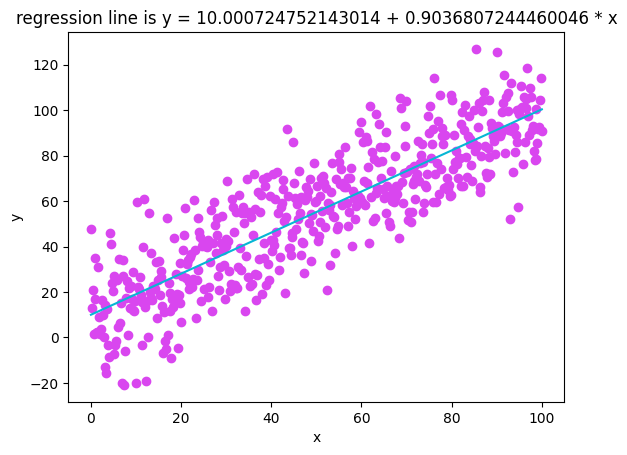

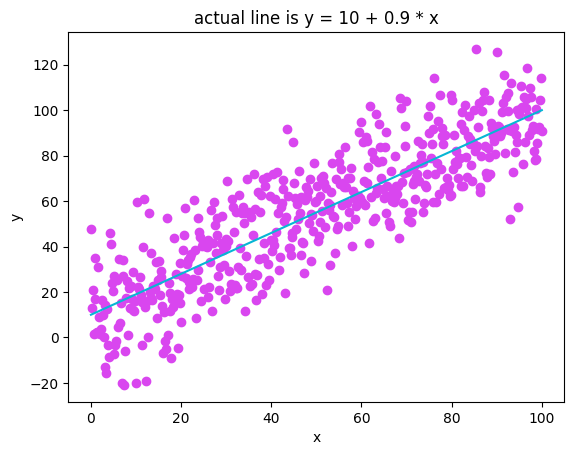

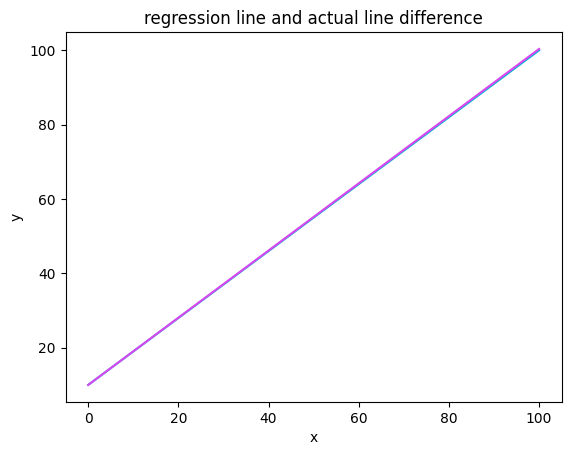

In [ ]:
model = LinearRegression()

domain = (domain_min,domain_max)
x_train, y_train, y  = generateTrainData(samples,domain,noise)

b_0,b_1 = model.fit((x_train,y_train))

print(f"b_0 = {b_0}, b_1 = {b_1}")

y_prediction = b_0 + b_1 * x_train

plot(x_train, (y_prediction, y_train), plt.scatter, f"regression line is y = {b_0} + {b_1} * x")
plot(x_train, (y, y_train), plt.scatter, f"actual line is y = {intercept} + {slope} * x")
plot(x_train, (y, y_prediction), plt.plot, "regression line and actual line difference")


Generalization test

In [ ]:
test_samples = 100 # @param {"type":"number"}
x_test = np.linspace(*domain, test_samples)

y_test = intercept + slope * x_test
y_prediction_test = b_0 + b_1 * x_test

plot(x_test, (y_test, y_prediction_test), plt.plot, "regression line and actual line difference in test data")


: 